# Laboration - skolstatistik

## Uppgift 0 - uppvärmning med riket

### a)

In [154]:
import pandas as pd

[df_math, df_english, df_swedish, df_sfi] = [
    pd.read_excel("./data/riket2023_åk9_np.xlsx", sheet_name=sheet, skiprows=8)
    for sheet in ["Matematik", "Engelska", "Svenska", "Svenska som andraspråk"]
]

for df in [df_math, df_english, df_swedish, df_sfi]:
    df.columns = [
        "Plats",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (poäng)",
        "Flickor (poäng)",
        "Pojkar (poäng)",
    ]

df_sfi

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,..,..,..,..,..,..,..,..,..


### b)

In [155]:
[total_f, girls_f, boys_f] = [
    int(round(df_math.at[0, f"{name} (A-F)"] * ((100 - df_math.at[0, f"{name} (A-E)"]) / 100)))
    for name in ["Totalt", "Flickor", "Pojkar"]
]

# The amount of failed grades for boys and girls don't quite add up to the total failed grades.
# This could be because of the imprecise ~100 values from "skolverket" or because some students identify as nonbinary or similar.
print(
    f"Totalt fick circa {total_f} elever underkänt i matte, av dessa så var {girls_f} flickor och {boys_f} pojkar."
)

Totalt fick circa 11637 elever underkänt i matte, av dessa så var 5825 flickor och 5798 pojkar.


### c)

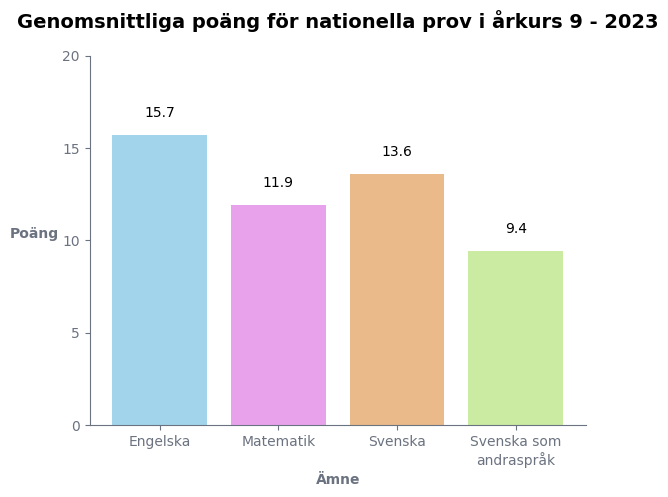

In [156]:
import matplotlib.pyplot as plt
import numpy as np


# Gotten from: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 1, y[i], ha="center")


x = np.array(["Engelska", "Matematik", "Svenska", "Svenska som\nandraspråk"])
y = np.array(
    [df.at[0, "Totalt (poäng)"] for df in [df_english, df_math, df_swedish, df_sfi]]
)

GRAY1 = "#6b7280"

color = ["#A2D5EB", "#E8A2EB", "#EBBA8B", "#CBEBA2"]

ax = plt.subplot(111)

ax.bar(x, y, color=color)
ax.set_title(
    "Genomsnittliga poäng för nationella prov i årkurs 9 - 2023",
    fontdict={"fontsize": 14},
    fontweight="bold",
    pad=20,
)
ax.set_xlabel("Ämne", color=GRAY1, fontweight="bold")
ax.set_ylabel("Poäng", rotation=0, labelpad=20, color=GRAY1, fontweight="bold")
ax.set_yticks(range(0, 21, 5))
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color(GRAY1)
ax.tick_params(colors=GRAY1)
addlabels(x, y)

### d)

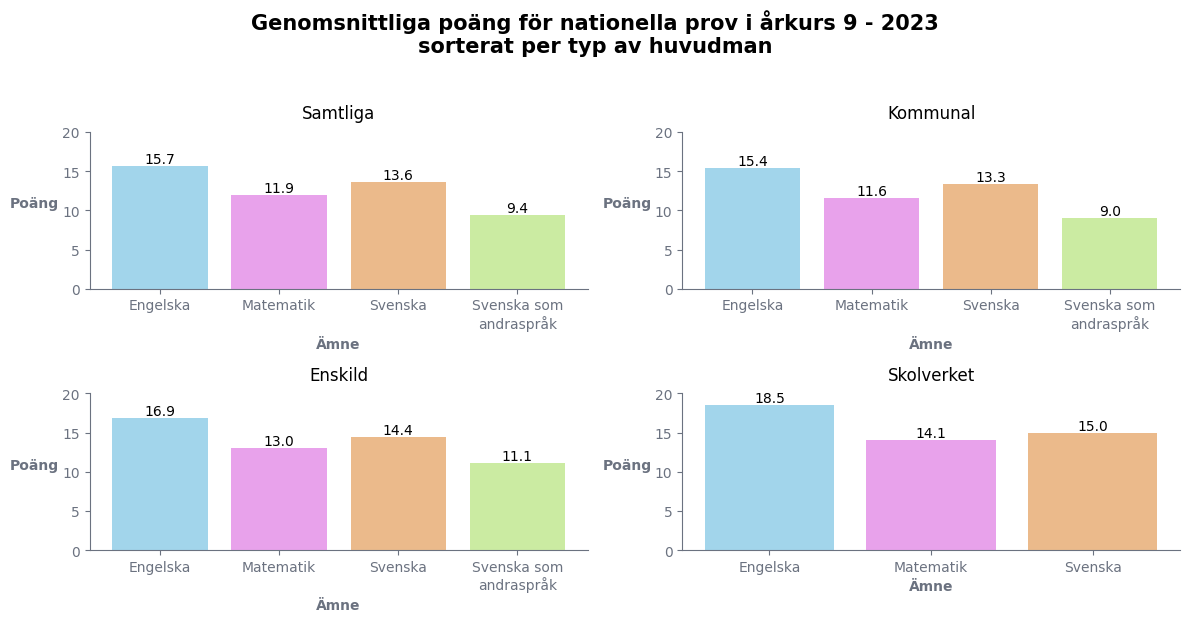

In [157]:
fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12, 6))
admin_type = {0:"Samtliga", 1:"Kommunal", 2:"Enskild", 3:"Skolverket"}
for admin, ax in zip(admin_type, axes.flatten()):
    # Skip "Svenska som andraspråk" for skolverket since they don't have results for that subject
    if admin_type[admin] == "Skolverket":
        x = ["Engelska", "Matematik", "Svenska"]
        y = [df.at[admin, "Totalt (poäng)"] for df in [df_english, df_math, df_swedish]]
    else:
        x = ["Engelska", "Matematik", "Svenska", "Svenska som\nandraspråk"]
        y = [
            df.at[admin, "Totalt (poäng)"]
            for df in [df_english, df_math, df_swedish, df_sfi]
        ]
    ax.bar(x, y, color=color)
    ax.set_title(f"{admin_type[admin]}", pad=10)
    ax.set_xlabel("Ämne", color=GRAY1, fontweight="bold")
    ax.set_ylabel("Poäng", rotation=0, labelpad=20, color=GRAY1, fontweight="bold")
    ax.set_yticks(range(0, 21, 5))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color(GRAY1)
    ax.tick_params(colors=GRAY1)
    ax.bar_label(ax.containers[0], fmt=lambda x: x if x > 0 else "", label_type="edge")

fig.suptitle(
    "Genomsnittliga poäng för nationella prov i årkurs 9 - 2023\nsorterat per typ av huvudman",
    y=1.03,
    fontweight="bold",
    fontsize=15
)
fig.tight_layout()

## Uppgift 1 - uppvärmning betyg och prov

### a)

In [158]:
df_results_yearly = pd.read_excel(
    "./data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7, usecols=([0, 7, 8, 9])
).head()

df_results_yearly.columns = [
    "Läsår",
    "Totalt",
    "Flickor",
    "Pojkar",
]

df_results_yearly

,Läsår,Totalt,Flickor,Pojkar
0,2018/19,24.5,21.7,27.2
1,2019/20,23.9,21.4,26.3
2,2020/21,23.9,21.9,25.9
3,2021/22,25.9,24.2,27.5
4,2022/23,26.8,25.5,28.0


In [159]:
import plotly_express as px


fig = px.line(
    df_results_yearly,
    x="Läsår",
    y=["Totalt", "Flickor", "Pojkar"],
    title="Andel av elever utan godkänt betyg i ett eller flera ämnen under läsår 2018-2023",
    markers=True,
    color_discrete_map={"Totalt": "gray", "Flickor": "#F073C3", "Pojkar": "#769BF0"},
).update_layout(yaxis_title="% utan godkänt", legend_title="Kön", hovermode="x", yaxis_range=[19, 30])
# Code for changing labels at hover from: https://stackoverflow.com/questions/72773775/plotly-express-line-chart-renaming-variable-in-legend-title-and-hover-text
names = {"variable": "Kön", "value": "%"}
fig.for_each_trace(
    lambda t: t.update(
        hovertemplate=t.hovertemplate.replace("variable", names["variable"]).replace(
            "value", names["value"]
        )
    )
)
fig.update_yaxes(
    ticksuffix=" ",
    showline=True,
    linewidth=2,
    linecolor="gray",
    showticklabels=True,
    showgrid=False,
)
fig.update_xaxes(
    showspikes=True,
    spikemode="across",
    spikecolor="gray",
    spikesnap="cursor",
    spikedash="solid",
    showgrid=False,
    showline=True,
    linewidth=2,
    linecolor="gray",
    showticklabels=True,
    ticks="outside",
    tickcolor="gray",
)
fig.show()

### b)

In [160]:
df_16merits_yearly = pd.read_excel(
    "./data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7, usecols=([0, 1, 2, 3])
).head()
df_16merits_yearly.columns = [
    "Läsår",
    "Totalt",
    "Flickor",
    "Pojkar",
]
df_16merits_yearly

,Läsår,Totalt,Flickor,Pojkar
0,2018/19,221.7,234.3,209.8
1,2019/20,222.9,235.7,210.9
2,2020/21,223.9,235.4,212.9
3,2021/22,221.2,231.6,211.4
4,2022/23,220.6,229.7,211.9


In [161]:
fig = px.line(
    df_16merits_yearly,
    x="Läsår",
    y=["Totalt", "Flickor", "Pojkar"],
    title="Elevers genomsnittliga meritvärde för 16 ämnen under läsår 2018-2023",
    markers=True,
    color_discrete_map={"Totalt": "gray", "Flickor": "#F073C3", "Pojkar": "#769BF0"},
).update_layout(
    yaxis_title="Meritvärde", legend_title="Kön", hovermode="x", yaxis_range=[200, 250]
)
names = {"variable": "Kön", "value": "Meritvärde"}
fig.for_each_trace(
    lambda t: t.update(
        hovertemplate=t.hovertemplate.replace("variable", names["variable"]).replace(
            "value", names["value"]
        )
    )
)

fig.update_yaxes(
    ticksuffix=" ",
    showline=True,
    linewidth=2,
    linecolor="gray",
    showticklabels=True,
    showgrid=False,
)
fig.update_xaxes(
    showspikes=True,
    spikemode="across",
    spikecolor="gray",
    spikesnap="cursor",
    spikedash="solid",
    showgrid=False,
    showline=True,
    linewidth=2,
    linecolor="gray",
    showticklabels=True,
    ticks="outside",
    tickcolor="gray",
)

fig.show()

### c)

In [162]:
df_parent_edu_23 = pd.read_excel(
    "./data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=29, usecols=([0, 7, 8, 9])
).head(3)
df_parent_edu_23.columns = [
    "Föräldrarnas högsta utbildning",
    "Totalt",
    "Flickor",
    "Pojkar",
]
df_parent_edu_23

,Föräldrarnas högsta utbildning,Totalt,Flickor,Pojkar
0,Förgymnasial utbildning,63.5,61.5,65.3
1,Gymnasial utbildning,37.4,35.2,39.5
2,Eftergymnasial utbildning,16.8,16.1,17.5


In [163]:
fig = px.bar(
    df_parent_edu_23,
    x="Föräldrarnas högsta utbildning",
    y=["Flickor", "Pojkar"],
    barmode="group",
    title="Andel flickor och pojkar som saknar godkänt betyg i ett eller flera ämnen för läsåret 2022/2023<br>baserat på föräldrarnas högsta utbildningnivå",
    color_discrete_map={"Flickor": "#F073C3", "Pojkar": "#769BF0"},
    text_auto=True
).update_layout(
    yaxis_title="Procent %",
    legend_title="Kön",
    yaxis_range=[0, 100],
    yaxis=dict(tickmode="linear", tick0=0, dtick=25),
)
names = {"variable": "Kön", "value": "%"}
fig.for_each_trace(
    lambda t: t.update(
        hovertemplate=t.hovertemplate.replace("variable", names["variable"]).replace(
            "value", names["value"]
        )
    )
)
fig.update_traces(textposition="outside")
fig.update_yaxes(
    ticksuffix=" ",
    showline=True,
    linewidth=2,
    linecolor="gray",
    showticklabels=True,
)
fig.update_xaxes(
    showline=True,
    linewidth=2,
    linecolor="gray",
    showticklabels=True,
    ticks="outside",
    tickcolor="gray",
)

fig.show()

In [164]:
df_student_origin_23 = pd.read_excel(
    "./data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=19, usecols=([0, 4, 5, 6])
).head(9).drop(index=(range(2, 8)))
df_student_origin_23.columns = [
    "Elevers bakgrund",
    "Totalt",
    "Flickor",
    "Pojkar",
]

df_student_origin_23

,Elevers bakgrund,Totalt,Flickor,Pojkar
0,Elever med svensk bakgrund,236.0,245.4,227.1
1,Elever med utländsk bakgrund,210.2,221.0,200.1
8,Elever med okänd bakgrund,135.2,135.8,134.6


In [165]:
fig = px.bar(
    df_student_origin_23,
    x="Elevers bakgrund",
    y=["Totalt", "Flickor", "Pojkar"],
    barmode="group",
    title="Genomsnittligt meritvärde beräknat på 17 ämnen för elever med olika bakgrund under läsåret 2022/2023",
    color_discrete_map={"Totalt": "gray", "Flickor": "#F073C3", "Pojkar": "#769BF0"},
    text_auto=True
).update_layout(
    yaxis_title="Meritvärde",
    legend_title="Kön",
    yaxis_range=[0, 300],
    yaxis=dict(tickmode="linear", tick0=0, dtick=50),
)
names = {"variable": "Kön", "value": "%"}
fig.for_each_trace(
    lambda t: t.update(
        hovertemplate=t.hovertemplate.replace("variable", names["variable"]).replace(
            "value", names["value"]
        )
    )
)
fig.update_traces(textposition="outside")
fig.update_yaxes(
    ticksuffix=" ",
    showline=True,
    linewidth=2,
    linecolor="gray",
    showticklabels=True,
)
fig.update_xaxes(
    showline=True,
    linewidth=2,
    linecolor="gray",
    showticklabels=True,
    ticks="outside",
    tickcolor="gray",
)

fig.show()

## Uppgift 2 - KPIer & EDA

KPI #1 En KPI att undersöka skulle kunna vara vilka kommuner som ser bäst respektive sämst resultat i nationella prov för Engelska årskurs 9

In [166]:
# make relevant dataframe from excel sheet
df_english_regions_23 = pd.read_excel("./data/betyg_o_prov_kommun.xlsx", sheet_name="Engelska", skiprows=8,)
df_english_regions_23.head()

,Kommun,Kommun-kod,Län,Läns-kod,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Ale,1440,Västra Götalands län,14,333,161,172,98.5,~100,~100,15.7,15.6,15.8
1,Alingsås,1489,Västra Götalands län,14,475,224,251,97.9,~100,..,15.8,16.1,15.5
2,Alvesta,764,Kronobergs län,7,246,123,123,95.1,..,~100,14.9,14.9,14.9
3,Aneby,604,Jönköpings län,6,75,29,46,~100,~100,~100,14.9,14.3,15.3
4,Arboga,1984,Västmanlands län,19,130,53,77,93.1,..,~100,14.4,14.1,14.7


In [167]:
# Adjust column titles
df_english_regions_23.columns = [
    "Kommun",
    "Kommun-kod",
    "Län",
    "Läns-kod",
    "Totalt (A-F)",
    "Flickor (A-F)",
    "Pojkar (A-F)",
    "Totalt (A-E)",
    "Flickor (A-E)",
    "Pojkar (A-E)",
    "Totalt (poäng)",
    "Flickor (poäng)",
    "Pojkar (poäng)",
]
df_english_regions_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kommun           290 non-null    object 
 1   Kommun-kod       290 non-null    int64  
 2   Län              290 non-null    object 
 3   Läns-kod         290 non-null    int64  
 4   Totalt (A-F)     290 non-null    int64  
 5   Flickor (A-F)    290 non-null    object 
 6   Pojkar (A-F)     290 non-null    object 
 7   Totalt (A-E)     290 non-null    object 
 8   Flickor (A-E)    290 non-null    object 
 9   Pojkar (A-E)     290 non-null    object 
 10  Totalt (poäng)   290 non-null    float64
 11  Flickor (poäng)  290 non-null    object 
 12  Pojkar (poäng)   290 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 29.6+ KB


In [168]:
# Remove regions where the total amount of students are less than 100 to reduce anomalies
df_english_regions_23 = df_english_regions_23[df_english_regions_23["Totalt (A-F)"] >= 100]
df_english_regions_23.head()

,Kommun,Kommun-kod,Län,Läns-kod,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Ale,1440,Västra Götalands län,14,333,161,172,98.5,~100,~100,15.7,15.6,15.8
1,Alingsås,1489,Västra Götalands län,14,475,224,251,97.9,~100,..,15.8,16.1,15.5
2,Alvesta,764,Kronobergs län,7,246,123,123,95.1,..,~100,14.9,14.9,14.9
4,Arboga,1984,Västmanlands län,19,130,53,77,93.1,..,~100,14.4,14.1,14.7
7,Arvika,1784,Värmlands län,17,226,113,113,~100,~100,~100,15.6,15.8,15.5


In [169]:
# pick out the top 5 and bottom 5 results
[english_top5, english_bottom5] = [df_english_regions_23.sort_values(by="Totalt (poäng)", ascending=b).head() for b in [False, True]]
english_top5

,Kommun,Kommun-kod,Län,Läns-kod,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
27,Danderyd,162,Stockholms län,1,505,238,267,100,100,100,18.3,18.4,18.3
120,Lidingö,186,Stockholms län,1,590,299,291,~100,100,~100,18.1,18.2,18
234,Täby,160,Stockholms län,1,1243,584,659,~100,~100,~100,17.7,17.8,17.7
150,Nacka,182,Stockholms län,1,1472,699,773,99.5,~100,~100,17.4,17.4,17.5
128,Lomma,1262,Skåne län,12,374,168,206,~100,~100,100,17.4,17,17.6


In [170]:
# sort the bottom 5 results to also be descending
english_bottom5 = english_bottom5.sort_values(by="Totalt (poäng)", ascending=False)
english_bottom5

,Kommun,Kommun-kod,Län,Läns-kod,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
287,Östra Göinge,1256,Skåne län,12,165,83,82,92.1,..,~100,13.5,12.9,14.2
225,Tomelilla,1270,Skåne län,12,118,62,56,92.4,85.5,100,13.5,12.3,14.7
248,Vara,1470,Västra Götalands län,14,155,67,88,91.6,~100,..,13.5,13.9,13.3
183,Simrishamn,1291,Skåne län,12,176,92,84,87.5,87,88.1,13.5,13.2,13.8
170,Oxelösund,481,Södermanlands län,4,104,45,59,90.4,88.9,91.5,12.9,12.3,13.3


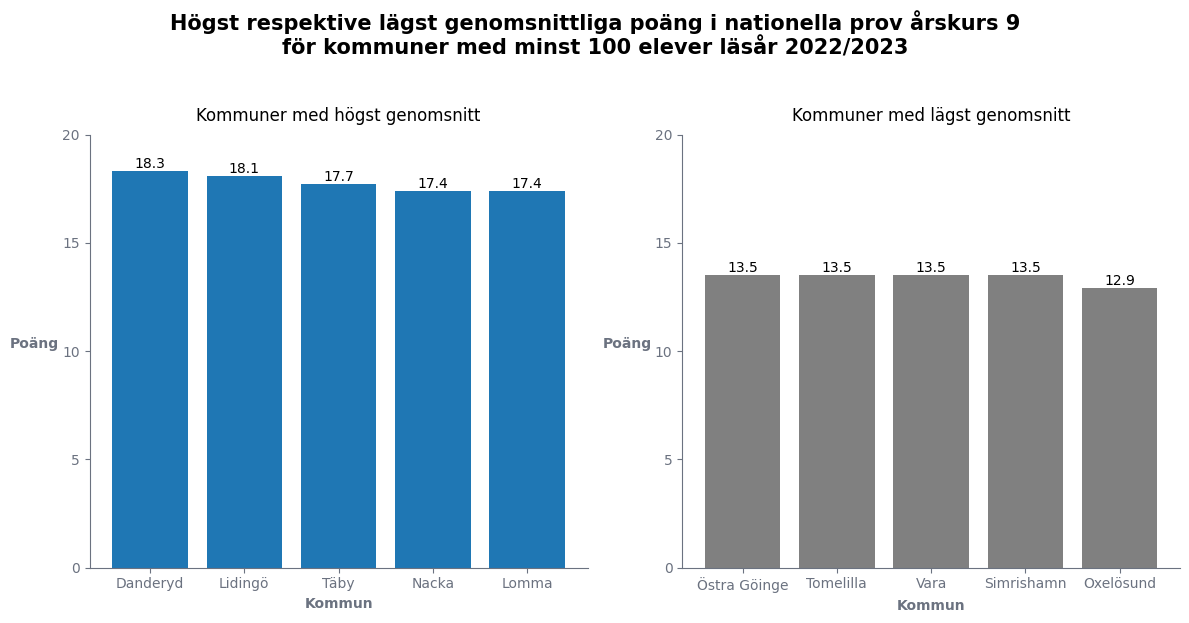

In [171]:
# create bar chart for each dataframe
fig, axes = plt.subplots(1, 2, dpi=100, figsize=(12, 6))
measure = {"högst": english_top5, "lägst": english_bottom5}
for ax, m in zip(axes, measure):
    if m == "högst":
        ax.bar(measure[m]["Kommun"], measure[m]["Totalt (poäng)"])
        ax.set_title(f"Kommuner med högst genomsnitt", pad=10)
    else:
        ax.bar(measure[m]["Kommun"], measure[m]["Totalt (poäng)"], color="gray")
        ax.set_title(f"Kommuner med lägst genomsnitt", pad=10)
    ax.set_xlabel("Kommun", color=GRAY1, fontweight="bold")
    ax.set_ylabel("Poäng", rotation=0, labelpad=20, color=GRAY1, fontweight="bold")
    ax.set_yticks(range(0, 21, 5))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color(GRAY1)
    ax.tick_params(colors=GRAY1)
    ax.bar_label(ax.containers[0], fmt=lambda x: x if x > 0 else "", label_type="edge")

fig.suptitle(
    "Högst respektive lägst genomsnittliga poäng i nationella prov årskurs 9\nför kommuner med minst 100 elever läsår 2022/2023",
    y=1.03,
    fontweight="bold",
    fontsize=15,
)
fig.tight_layout()

KPI #2 En annan KPI skulle kunna vara att undersöka hur det genomsnittliga meritvärdet i min hemkommun Lerum har förändrats över de senaste åren

In [172]:
# make relevant dataframe from excel sheet
df_region = pd.read_excel("./data/betyg_över_tid_kommun.xlsx", sheet_name="Kommunal", skiprows=7, usecols=([0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))
df_region.head()

,Kommun,Uppgift,2022/23,2021/22,2020/21,2019/20,2018/19,2017/18,2016/17,2015/16,2014/15,2013/14
0,Ale,Totalt antal elever årskurs 9,373,404,356,372,322,344,278,343,285,273
1,Ale,- andel (%) flickor,49.6,50.2,47.2,47.6,48.4,44.8,40.3,43.4,46,48
2,Ale,- andel (%) pojkar,50.4,49.8,52.8,52.4,51.6,55.2,59.7,56.6,54,52
3,Ale,- andel (%) elever med utländsk bakgrund,25.3,22.6,23.4,23.2,20,22,23,22.3,14.1,22.3
4,Ale,- andel (%) med föräldrar med eftergymnasial u...,60.3,56.5,55,54.8,54.1,47.6,48.3,42.4,44.3,40.6


In [173]:
# Sort to get data for Lerums Kommun only
df_lerum = df_region[df_region["Kommun"] == "Lerum"]
df_lerum.head()

,Kommun,Uppgift,2022/23,2021/22,2020/21,2019/20,2018/19,2017/18,2016/17,2015/16,2014/15,2013/14
1062,Lerum,Totalt antal elever årskurs 9,612,589,619,585,504,536,535,451,439,432
1063,Lerum,- andel (%) flickor,48.9,47.2,47.5,47.5,47.2,48.1,43,47.2,44.4,46.5
1064,Lerum,- andel (%) pojkar,51.1,52.8,52.5,52.5,52.8,51.9,57,52.8,55.6,53.5
1065,Lerum,- andel (%) elever med utländsk bakgrund,12,11.2,11.6,10.1,9.8,9.5,7.1,9.9,8.2,8.8
1066,Lerum,- andel (%) med föräldrar med eftergymnasial u...,70.4,70.7,70.2,66.3,66.8,63,62.9,63.8,61.3,62.2


In [174]:
# Transpose so that years are on rows
df_lerum_over_time = df_lerum.T.reset_index(drop=False)
df_lerum_over_time

,index,1062,1063,1064,1065,1066,1067,1068,1069,1070
0,Kommun,Lerum,Lerum,Lerum,Lerum,Lerum,Lerum,Lerum,Lerum,Lerum
1,Uppgift,Totalt antal elever årskurs 9,- andel (%) flickor,- andel (%) pojkar,- andel (%) elever med utländsk bakgrund,- andel (%) med föräldrar med eftergymnasial u...,Genomsnittligt meritvärde (17 ämnen),Genomsnittligt meritvärde (16 ämnen),Andel (%) behöriga till yrkesprogram,Andel (%) som fått godkänt betyg i alla ämnen
2,2022/23,612,48.9,51.1,12,70.4,223.1,215.8,82.7,70.9
3,2021/22,589,47.2,52.8,11.2,70.7,230.1,221.7,86.6,76.1
4,2020/21,619,47.5,52.5,11.6,70.2,232.5,224.3,85.9,78
5,2019/20,585,47.5,52.5,10.1,66.3,238.7,229.7,88.7,80.7
6,2018/19,504,47.2,52.8,9.8,66.8,235.2,226.8,89.3,78.8
7,2017/18,536,48.1,51.9,9.5,63,234.1,225.4,89.2,82.1
8,2016/17,535,43,57,7.1,62.9,219.9,212.6,82.6,75.7
9,2015/16,451,47.2,52.8,9.9,63.8,224.7,217.2,87.1,77.4


In [175]:
# Remove unnecessary rows
df_lerum_over_time = df_lerum_over_time.drop([0, 1], axis="rows")
df_lerum_over_time

,index,1062,1063,1064,1065,1066,1067,1068,1069,1070
2,2022/23,612,48.9,51.1,12,70.4,223.1,215.8,82.7,70.9
3,2021/22,589,47.2,52.8,11.2,70.7,230.1,221.7,86.6,76.1
4,2020/21,619,47.5,52.5,11.6,70.2,232.5,224.3,85.9,78
5,2019/20,585,47.5,52.5,10.1,66.3,238.7,229.7,88.7,80.7
6,2018/19,504,47.2,52.8,9.8,66.8,235.2,226.8,89.3,78.8
7,2017/18,536,48.1,51.9,9.5,63,234.1,225.4,89.2,82.1
8,2016/17,535,43,57,7.1,62.9,219.9,212.6,82.6,75.7
9,2015/16,451,47.2,52.8,9.9,63.8,224.7,217.2,87.1,77.4
10,2014/15,439,44.4,55.6,8.2,61.3,218.8,211.3,90.4,80
11,2013/14,432,46.5,53.5,8.8,62.2,.,219.8,92.1,83.6


In [176]:
# Rename columns
df_lerum_over_time.columns = [
        "Läsår",
        "Totalt antal elever årskurs 9",
        "andel (%) flickor",
        "andel (%) pojkar",
        "andel (%) elever med utländsk bakgrund",
        "andel (%) med föräldrar med eftergymnasial utbildning",
        "Genomsnittligt meritvärde (17 ämnen)",
        "Genomsnittligt meritvärde (16 ämnen)",
        "Andel (%) behöriga till yrkesprogram",
        "Andel (%) som fått godkänt betyg i alla ämnen"
    ]

df_lerum_over_time

,Läsår,Totalt antal elever årskurs 9,andel (%) flickor,andel (%) pojkar,andel (%) elever med utländsk bakgrund,andel (%) med föräldrar med eftergymnasial utbildning,Genomsnittligt meritvärde (17 ämnen),Genomsnittligt meritvärde (16 ämnen),Andel (%) behöriga till yrkesprogram,Andel (%) som fått godkänt betyg i alla ämnen
2,2022/23,612,48.9,51.1,12,70.4,223.1,215.8,82.7,70.9
3,2021/22,589,47.2,52.8,11.2,70.7,230.1,221.7,86.6,76.1
4,2020/21,619,47.5,52.5,11.6,70.2,232.5,224.3,85.9,78
5,2019/20,585,47.5,52.5,10.1,66.3,238.7,229.7,88.7,80.7
6,2018/19,504,47.2,52.8,9.8,66.8,235.2,226.8,89.3,78.8
7,2017/18,536,48.1,51.9,9.5,63,234.1,225.4,89.2,82.1
8,2016/17,535,43,57,7.1,62.9,219.9,212.6,82.6,75.7
9,2015/16,451,47.2,52.8,9.9,63.8,224.7,217.2,87.1,77.4
10,2014/15,439,44.4,55.6,8.2,61.3,218.8,211.3,90.4,80
11,2013/14,432,46.5,53.5,8.8,62.2,.,219.8,92.1,83.6


In [177]:
# sort so that years are in chronological order
df_lerum_over_time = df_lerum_over_time.sort_index(ascending=False)

C:\Users\Erik\AppData\Local\Temp\ipykernel_20248\1878591513.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



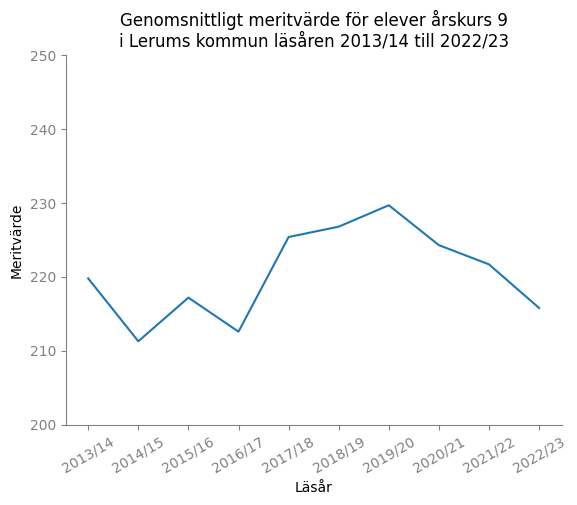

In [180]:
import seaborn as sns
# Make lineplot with seaborn
ax = sns.lineplot(
    data=df_lerum_over_time, x="Läsår", y="Genomsnittligt meritvärde (16 ämnen)"
)
ax.set(
    ylabel="Meritvärde",
    title="Genomsnittligt meritvärde för elever årskurs 9\ni Lerums kommun läsåren 2013/14 till 2022/23",
    ylim=(200, 250)
)
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("gray")
ax.tick_params(colors="gray")
ax.set_xticklabels(df_lerum_over_time["Läsår"], rotation=30)
plt.show()